In [24]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

X, y = make_regression(n_samples=1000, n_features=3, noise=10, random_state=42)
X = np.c_[np.zeros(X.shape[0]), X]
split_ratio = 0.8
split_index = int(split_ratio * X.shape[0])
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

class LinearModel:
    def __init__(self, X, y, iterations, lr=0.01):
        self.weights = np.zeros(X.shape[1]) 
        self.bias = 0  
        self.lr = lr  
        self.X = X 
        self.y = y  
        self.it = iterations  

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

    def Loss(self, y, y_pred):
        m = len(y)  # Number of examples
        cost = np.sum((y_pred - y) ** 2) / (2 * m)
        return cost

    def gradientDescent(self):
        m = len(self.y)  # Number of examples
        for i in range(self.it):
            y_pred = self.predict(self.X)
            dw = np.dot(self.X.T, (y_pred - self.y)) / m
            db = np.sum(y_pred - self.y) / m
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            cost = self.Loss(self.y, y_pred)
            if i % 10 == 0:
                print(f"Epoch {i}: Loss = {cost}")

    def fit(self):
        self.gradientDescent()

In [25]:
model = LinearModel(X_train, y_train, iterations=100, lr=0.01)

In [21]:
def compute_mse(X, y, weights, bias):
    predictions = np.dot(X, weights) + bias
    errors = predictions - y
    mse = np.mean(errors ** 2)
    return mse

def compute_mae(X, y, weights, bias):
    predictions = np.dot(X, weights) + bias
    errors = np.abs(predictions - y)
    mae = np.mean(errors)
    return mae

test_mse = compute_mse(X_test, y_test, model.weights, model.bias)
test_mae = compute_mae(X_test, y_test, model.weights, model.bias)
model.fit()

print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")

Epoch 0: Loss = 49.4274606345049
Epoch 10: Loss = 49.427460634500115
Epoch 20: Loss = 49.4274606344961
Epoch 30: Loss = 49.42746063449278
Epoch 40: Loss = 49.42746063449
Epoch 50: Loss = 49.42746063448769
Epoch 60: Loss = 49.42746063448576
Epoch 70: Loss = 49.42746063448415
Epoch 80: Loss = 49.427460634482834
Epoch 90: Loss = 49.427460634481704
Test MSE: 93.75956819596836
Test MAE: 7.958081225211837


In [26]:
predictions = model.predict(X_test)

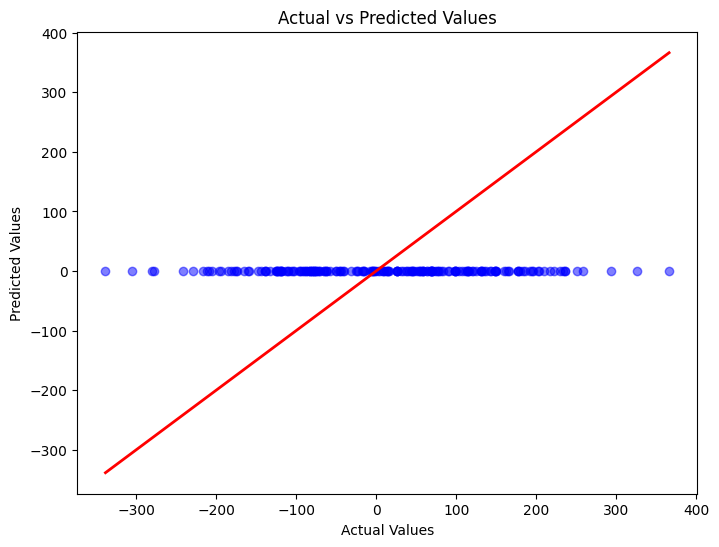

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()